In [5]:
import tweepy

In [6]:
import csv

In [7]:
import numpy as np

In [8]:
from textblob import TextBlob

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
consumerKey = "gYK4hUwUDdDriL3XbaCcxS732"
consumerSecret = "iqTjfbij6bMbgBL3b48cyox8YOdASpNs8cvZARoVAzSjWUWDmj"
accessToken = "4900371912-DxBfdFBbTkNwQYcU9WX5NVoA1mQlzFRBn5K0ZRi"
accessTokenSecret  = "7KPZcAsbIRLzHLXGlfF22sjmQ4Sh583I0gT7hqYBf6q0d"

In [14]:
authorization = tweepy.OAuthHandler(consumerKey, consumerSecret)
authorization.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authorization)

In [26]:
publicTweets = api.search('Amazon')
print publicTweets[2].text

メイクアイテムもしっかりチェック(´＾ё＾｀)【Amazon　ヘルス＆ビューティー（メイク・ネイル）ベストセラー】　https://t.co/dn1crcScpw


In [27]:
# Recognizing tweet sentiments
threshold = 0
positiveTweetSentiment = 0
negativeTweetSentiment = 0
for tweet in publicTweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity >= threshold:
        positiveTweetSentiment += 1
    else:
        negativeTweetSentiment -= 1
if positiveTweetSentiment > negativeTweetSentiment:
    print "Overall Positive Tweets."
else:
    print "Overall Negative Tweets."

Overall Positive Tweets.


<function matplotlib.pyplot.show>

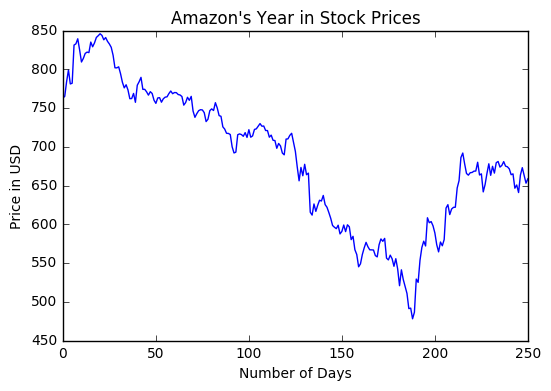

In [56]:
# Collecting Data for Stocks
dates = []
prices = []

def getData(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            # Extracting the dates from the csv file(the 0th element)
            dates.append(int(row[0].split('-')[0]))
            # Extracting the prices from the csv file(the 1st element)
            prices.append(float(row[1]))
    return
# amzn.csv is the latest stock data downloaded 
getData('amzn.csv')
plt.title('Amazon\'s Year in Stock Prices')
plt.ylabel('Price in USD')
plt.xlabel('Number of Days')
plt.plot(prices)
plt.show

In [58]:
def createTestandTrainingDatasets(dates, prices):
    # We declare training data which is 85 percent of our csv file
    trainingDataSize = int(0.85 * len(dates))
    trainingDataX, trainingDataY = []
    testDataX, testDataY = []
    counter = 0
    # We loop through the dates till and appropriately send the data
    # to either the testX or trainingX data sets
    for date in dates:
        if counter < trainingDataSize:
            trainingDataX.append(date)
        else:
            testDataX.append(date)
    # We loop through the prices till and appropriately send the data
    # to either the testY or trainingY data sets
    for price in prices:
        if counter < trainingDataSize:
            trainingDataY.append(price)
        else:
            testDataY.append(price)
    return trainingDataX, traininDataY, testDataX, testDataY
